# Analyse météorologique - Projet Data Science ESEO E3e

Ce notebook contient les étapes d'analyse exploratoire des données météo horaires pour trois départements : 05, 21 et 29.  
Les données ont été nettoyées en amont dans le dossier `clean_data/`.

---

## Imports

On importe les bibliothèques nécessaires à l’analyse (Pandas, Numpy, Seaborn, etc.).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

sns.set_theme(style="whitegrid")

---
## Positionnement du répertoire racine

Ce bloc permet d'assurer que le notebook est exécuté depuis la **racine du projet**, même s'il est physiquement dans un sous-dossier (`notebooks/`).

In [2]:
if 'project_root' not in globals():
    project_root = os.path.abspath("..")
    os.chdir(project_root)
    sys.path.append(project_root)

---
## Chargement des données nettoyées

Les fichiers nettoyés ont été prétraités avec `scripts/nettoyage.py`.  
On les charge ici dans un DataFrame unique par département trié selon la date.

In [4]:
df_05 = pd.concat([
    pd.read_csv(os.path.join("clean_data", "05", file), parse_dates=['datetime']) for file in os.listdir(os.path.join("clean_data", "05"))
]).sort_values("datetime").reset_index(drop=True)

In [5]:
df_21 = pd.concat([
    pd.read_csv(os.path.join("clean_data", "21", file), parse_dates=['datetime']) for file in os.listdir(os.path.join("clean_data", "21"))
]).sort_values("datetime").reset_index(drop=True)

In [6]:
df_29 = pd.concat([
    pd.read_csv(os.path.join("clean_data", "29", file), parse_dates=['datetime']) for file in os.listdir(os.path.join("clean_data", "29"))
]).sort_values("datetime").reset_index(drop=True)

In [7]:
dfs=[df_05, df_21, df_29]

---
## Statistiques de base

Pour chaque variable, on calcule les indicateurs descriptifs classiques : min, max, médiane, moyenne, écart-type…


In [8]:
from scripts.utils import statistiques_base

In [9]:

for col in ["T", "U", "FF", "RR1", "N"]:
    print(f"Statistiques pour {col} :")
    print(str(statistiques_base(df_05[col].dropna())).replace("'", '')[1:-1])

Statistiques pour T :
min: -29.2, Q1: 0.5, médiane: 6.6, Q3: 13.4, max: 41.0, moyenne: 7.209562595974603, écart-type: 9.3589906916337, écart-type relatif: 129.81357144827638
Statistiques pour U :
min: 1.0, Q1: 48.0, médiane: 69.0, Q3: 87.0, max: 100.0, moyenne: 66.17126625396168, écart-type: 23.09089160034448, écart-type relatif: 34.89564717066605
Statistiques pour FF :
min: 0.0, Q1: 0.8, médiane: 1.6, Q3: 3.1, max: 36.0, moyenne: 2.1893267731670005, écart-type: 2.0596658222967807, écart-type relatif: 94.0775880302849
Statistiques pour RR1 :
min: 0.0, Q1: 0.0, médiane: 0.0, Q3: 0.0, max: 60.7, moyenne: 0.09460411857714628, écart-type: 0.5801021054670789, écart-type relatif: 613.1890600450193
Statistiques pour N :
min: 0.0, Q1: 1.0, médiane: 4.0, Q3: 8.0, max: 9.0, moyenne: 4.219106186714733, écart-type: 3.307316099436752, écart-type relatif: 78.38902253398939


In [10]:
for col in ["T", "U", "FF", "RR1", "N"]:
    print(f"Statistiques pour {col} :")
    print(str(statistiques_base(df_21[col].dropna())).replace("'", '')[1:-1])

Statistiques pour T :
min: -23.4, Q1: 5.2, médiane: 10.5, Q3: 16.3, max: 42.0, moyenne: 10.906740365467282, écart-type: 7.882994868027636, écart-type relatif: 72.27635942436686
Statistiques pour U :
min: 10.0, Q1: 66.0, médiane: 83.0, Q3: 94.0, max: 100.0, moyenne: 78.04269728046322, écart-type: 18.387379990478077, écart-type relatif: 23.560666956959565
Statistiques pour FF :
min: 0.0, Q1: 1.7, médiane: 3.0, Q3: 4.3, max: 21.5, moyenne: 3.1850729186250915, écart-type: 2.133179499280323, écart-type relatif: 66.9742751196151
Statistiques pour RR1 :
min: 0.0, Q1: 0.0, médiane: 0.0, Q3: 0.0, max: 71.8, moyenne: 0.09384670666348553, écart-type: 0.5271301319410387, écart-type relatif: 561.6927334820774
Statistiques pour N :
min: 0.0, Q1: 6.0, médiane: 8.0, Q3: 8.0, max: 9.0, moyenne: 6.523915400557225, écart-type: 2.4769303682521437, écart-type relatif: 37.96692961470013


In [11]:
for col in ["T", "U", "FF", "RR1", "N"]:
    print(f"Statistiques pour {col} :")
    print(str(statistiques_base(df_29[col].dropna())).replace("'", '')[1:-1])

Statistiques pour T :
min: -9.0, Q1: 8.8, médiane: 11.9, Q3: 15.3, max: 41.0, moyenne: 11.952310168544999, écart-type: 4.967071783453214, écart-type relatif: 41.557420393298536
Statistiques pour U :
min: 2.0, Q1: 76.0, médiane: 87.0, Q3: 94.0, max: 100.0, moyenne: 83.84667174808234, écart-type: 12.9459514417456, écart-type relatif: 15.44003020256041
Statistiques pour FF :
min: 0.0, Q1: 2.8, médiane: 4.5, Q3: 7.0, max: 42.0, moyenne: 5.223563865909801, écart-type: 3.4590056547792103, écart-type relatif: 66.21926607145535
Statistiques pour RR1 :
min: 0.0, Q1: 0.0, médiane: 0.0, Q3: 0.0, max: 42.0, moyenne: 0.11872084203862604, écart-type: 0.5266030984135078, écart-type relatif: 443.56415383423285
Statistiques pour N :
min: 0.0, Q1: 5.0, médiane: 7.0, Q3: 8.0, max: 9.0, moyenne: 6.246181364036153, écart-type: 2.3761363932801896, écart-type relatif: 38.04142490900679


---
## Inspection des données

On vérifie que les types de colonnes sont corrects, qu’il n’y a pas de valeurs manquantes critiques, et que les plages temporelles sont cohérentes.

In [12]:
print(df_05.info())
print()
print(df_05.isna().sum())
print()
print(f'{df_05["datetime"].min()}, {df_05["datetime"].max()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3898220 entries, 0 to 3898219
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1   RR1       float64       
 2   FF        float64       
 3   T         float64       
 4   U         float64       
 5   N         float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 178.4 MB
None

datetime          0
RR1          894707
FF           625742
T             26102
U            522120
N           3860494
dtype: int64

2000-01-01 00:00:00, 2025-05-28 03:00:00


In [14]:
print(df_21.info())
print()
print(df_21.isna().sum())
print()
print(f'{df_21["datetime"].min()}, {df_21["datetime"].max()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3472050 entries, 0 to 3472049
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1   RR1       float64       
 2   FF        float64       
 3   T         float64       
 4   U         float64       
 5   N         float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 158.9 MB
None

datetime          0
RR1           35110
FF          2014672
T              5146
U           1446558
N           3326328
dtype: int64

2000-01-01 00:00:00, 2025-05-28 03:00:00


In [15]:
print(df_29.info())
print()
print(df_29.isna().sum())
print()
print(f'{df_29["datetime"].min()}, {df_29["datetime"].max()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622308 entries, 0 to 4622307
Data columns (total 6 columns):
 #   Column    Dtype         
---  ------    -----         
 0   datetime  datetime64[ns]
 1   RR1       float64       
 2   FF        float64       
 3   T         float64       
 4   U         float64       
 5   N         float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 211.6 MB
None

datetime          0
RR1          603680
FF          1002834
T            562799
U           1304335
N           3642246
dtype: int64

2000-01-01 00:00:00, 2025-05-28 03:00:00


---
## Température : évolution mensuelle

On observe ici l’évolution de la température moyenne mensuelle entre 2000 et 2025 pour les trois départements étudiés. Cela permet de visualiser les tendances saisonnières et les différences climatiques régionales.\
On utilise ici une agrégation mensuelle (via `resample("M").mean()`) pour lisser les données horaires trop nombreuses.

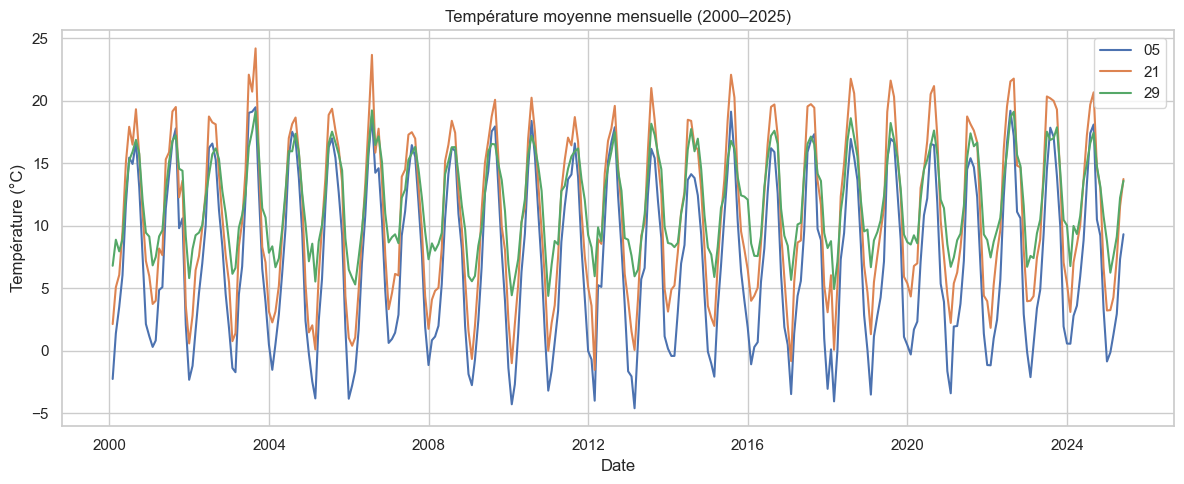

In [18]:
from scripts.utils import resample_mensuel

plt.figure(figsize=(12, 5))
plt.plot(resample_mensuel(df_05, "T"), label="05")
plt.plot(resample_mensuel(df_21, "T"), label="21")
plt.plot(resample_mensuel(df_29, "T"), label="29")
plt.title("Température moyenne mensuelle (2000–2025)")
plt.ylabel("Température (°C)")
plt.xlabel("Date")
plt.legend()
plt.tight_layout()
plt.show()

On observe des amplitudes saisonnières nettes pour les trois départements :

- **05 (Hautes-Alpes)** montre des hivers nettement plus froids et des étés modérés : c’est un climat montagnard.
- **21 (Côte-d'Or)** a une amplitude plus forte, avec des étés chauds et des hivers froids.
- **29 (Finistère)** est beaucoup plus tempéré : la courbe est plus "plate", montrant peu d’extrêmes, typique d’un climat océanique.

Le département 21 présente une **plus grande variabilité saisonnière**, avec des étés bien plus chauds que ses hivers. Cela se traduit visuellement par une grande différence entre les médianes hivernale et estivale.  
À l’inverse, dans le 29 (Finistère), les températures restent **plus modérées** tout au long de l’année, avec un écart plus faible entre les deux médianes : le climat y est donc plus **stable**, caractéristique du climat océanique.

---
## Comparaison des distributions de température (KDE)

Pour comparer les distributions de température entre départements, on utilise ici un graphique KDE (Kernel Density Estimation).  
Chaque courbe représente la densité estimée des températures pour un département.

Le code ci-dessous superpose les trois courbes KDE pour permettre une comparaison directe :


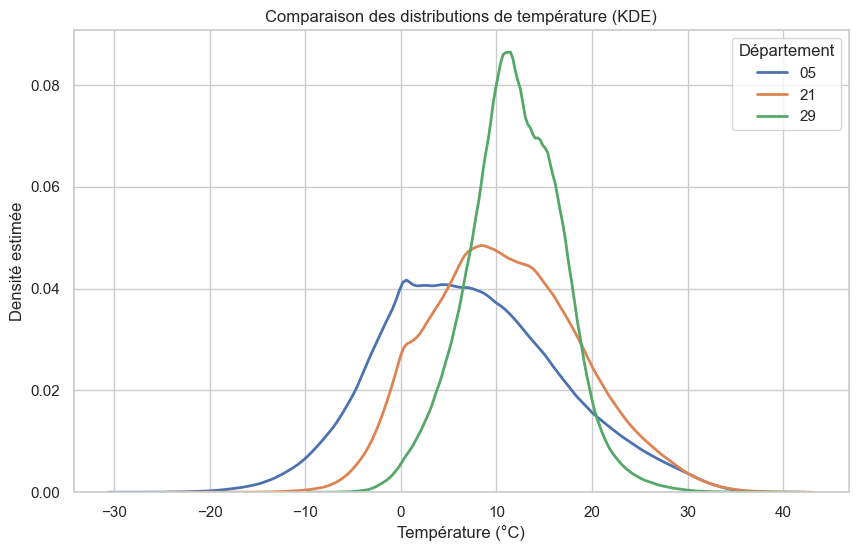

In [28]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df_05.dropna(subset=["T"]), x="T", label="05", linewidth=2)
sns.kdeplot(df_21.dropna(subset=["T"]), x="T", label="21", linewidth=2)
sns.kdeplot(df_29.dropna(subset=["T"]), x="T", label="29", linewidth=2)

plt.title("Comparaison des distributions de température (KDE)")
plt.xlabel("Température (°C)")
plt.ylabel("Densité estimée")
plt.legend(title="Département")
plt.grid(True)
plt.show()

On peut déduire plusieurs choses de ces courbes :

* **Le 29 (Finistère)** a la distribution la plus centrée (autour de 10 °C) et la plus étroite : c’est le département le plus stable en température, avec peu d’écarts au fil de l’année.
* **Le 05 (Hautes-Alpes)** présente la distribution la plus étalée, allant de -20 °C à +30 °C. Cette variabilité, typique d’un climat de montagne, s’accompagne d’une densité plus aplatie : les extrêmes sont possibles mais peu fréquents.
* **Le 21 (Côte-d'Or)** a une étendue plus réduite que le 05, mais sa courbe reste haute sur une plage resserrée de températures : cela traduit une concentration plus forte autour des températures moyennes, et donc une plus grande fréquence des extrêmes modérés.

Cela confirme la lecture du graphique temporel et appuie les différences climatiques liées à la géographie : plus océanique à l’ouest, plus montagneux au sud-est, et plus continental au centre-est.

---
## Boîtes à moustaches des températures par département

Les boîtes à moustaches permettent de **visualiser la dispersion**, la **médiane** et les **valeurs extrêmes** (outliers) des températures dans chaque département.

Chaque boîte montre :
- la médiane (trait central),
- l’intervalle interquartile (Q1–Q3),
- les extrêmes (tiges),
- les valeurs atypiques (points hors boîte).

In [31]:
df_05["département"] = "05"
df_21["département"] = "21"
df_29["département"] = "29"
df_all = pd.concat([df_05, df_21, df_29], ignore_index=True)

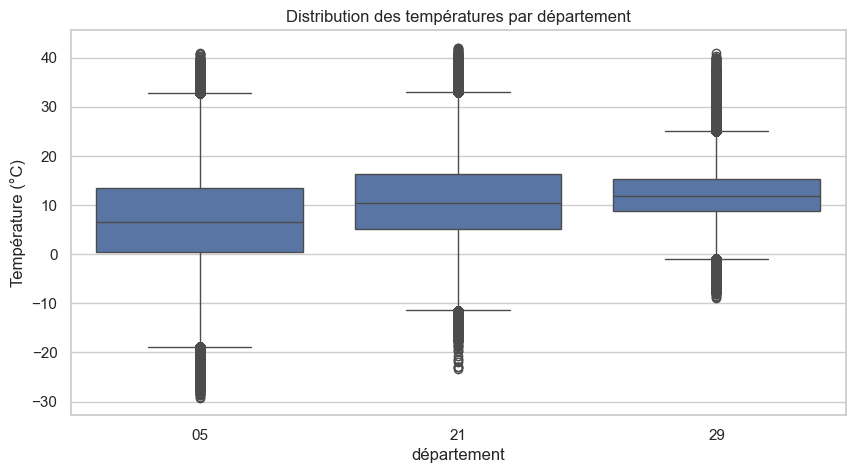

In [32]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_all, x="département", y="T")
plt.title("Distribution des températures par département")
plt.ylabel("Température (°C)")
plt.show()

Interprétations possibles :

- Le **département 05** a une dispersion très élevée (Q1 très bas, Q3 élevé), et une forte proportion de valeurs extrêmes : c’est cohérent avec son relief montagneux.
- Le **21** est plus centré autour de 10°C, mais montre aussi des extrêmes importants.
- Le **29** est plus stable avec peu d’outliers négatifs, et une boîte resserrée : les températures sont plus homogènes.

Ces observations sont en accord avec les courbes KDE et les valeurs statistiques précédentes.

Le boxplot montre de nombreuses "valeurs aberrantes" (outliers) au-dessus de la moustache supérieure, en particulier dans le 29.  
Cependant, ces points ne sont pas nécessairement des erreurs : dans un jeu de données très volumineux, **le critère statistique des moustaches identifie comme "outliers" toute valeur au-dessus de Q3 + 1.5×IQR**, même si ces valeurs sont **fréquentes de façon marginale**.  
Dans le 29, ces valeurs supérieures (~20–25°C) correspondent simplement à des **jours plus chauds mais rares**, typiques des **pics estivaux** du climat océanique.

Les boîtes à moustaches restent utiles ici pour comparer rapidement la dispersion et la médiane des températures entre départements.

Cependant, dans un jeu de données très volumineux comme le nôtre (plusieurs millions de mesures), il est courant d’observer un grand nombre de points au-delà des moustaches.

Ces points ne doivent **pas être interprétés comme des erreurs** : ce sont simplement des valeurs moins fréquentes, identifiées comme "outliers" selon la définition classique (au-delà de Q3 + 1.5×IQR).

Il est donc recommandé de **compléter cette visualisation** par d’autres outils comme des **KDE** ou **histogrammes** pour une compréhension plus fine.